c:\Users\MY PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 76s 33ms/step - accuracy: 0.6986 - loss: 1.0086 - val_accuracy: 0.8979 - val_loss: 0.3188
Epoch 2/2
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9058 - loss: 0.2827 - val_accuracy: 0.9170 - val_loss: 0.2467


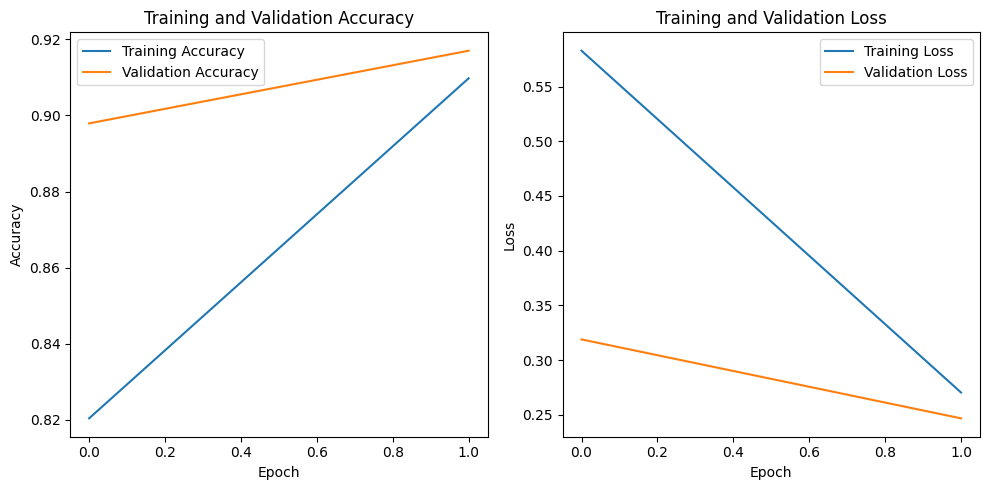

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


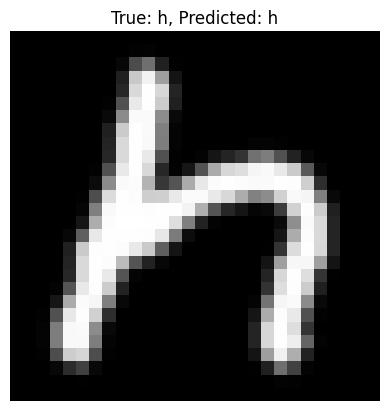

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


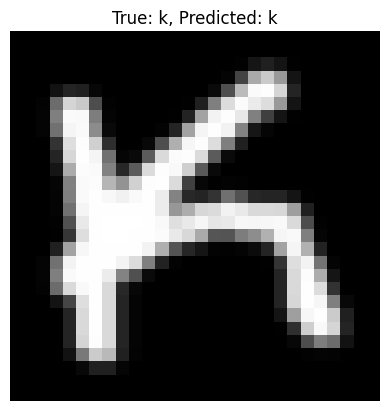

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


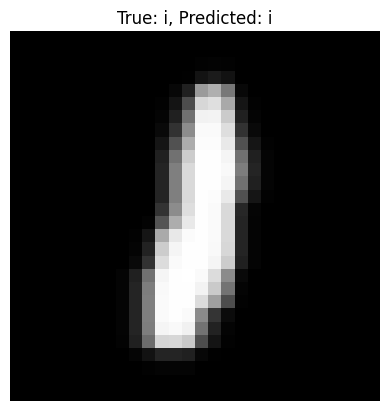

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


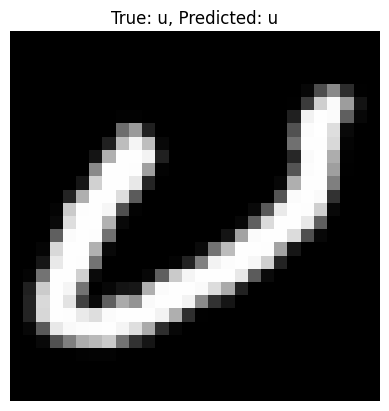

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


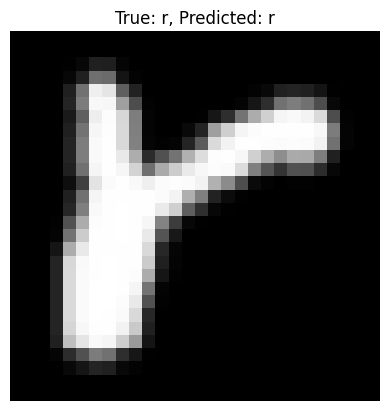

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


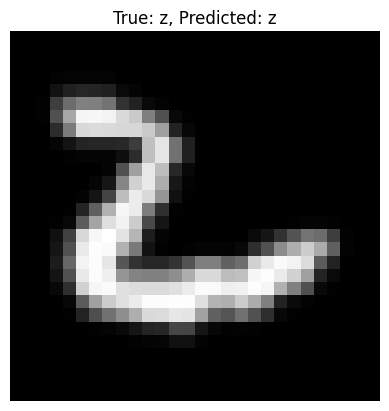

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


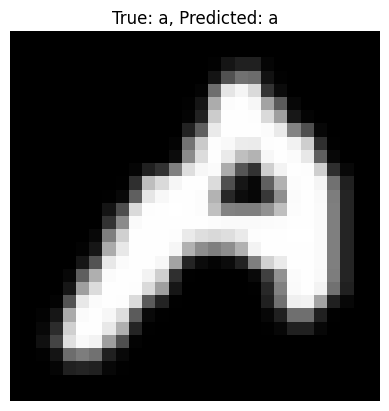

In [2]:
import os
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'


import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('emnist-letters-train.csv.zip', compression='zip', header=None)

labels = df.iloc[:, 0]
images = df.iloc[:, 1:]

images = images.values.reshape(-1, 28, 28, 1)

images = images.astype('float32') / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(27, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()




# testing
def predict_and_display():
    random_index = np.random.randint(0, len(val_images))
    random_image = val_images[random_index]
    random_label = val_labels.iloc[random_index]

    input_image = np.expand_dims(random_image, axis=0)

    predictions = model.predict(input_image)
    predicted_label = np.argmax(predictions)

    true_letter = decode_label(random_label)
    predicted_letter = decode_label(predicted_label)

    rotated_image = np.rot90(random_image, k=-1)
    flipped_image = np.fliplr(rotated_image)

    plt.imshow(flipped_image.squeeze(), cmap='gray')
    plt.title(f'True: {true_letter}, Predicted: {predicted_letter}')
    plt.axis('off')
    plt.show()

    return input("Do you want to predict another image? (yes/no): ").lower().strip() == "yes"


def decode_label(label):
    return chr(label + 96) if label != 0 else 'Z'

while True:
    if not predict_and_display():
        break